In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing dataset

In [2]:
from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras 
from keras.utils.np_utils import to_categorical   

from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Conv2DTranspose, Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
X_train, y_train = loadlocal_mnist(
            images_path='/content/gdrive/My Drive/Colab Notebooks/train-images.idx3-ubyte', 
            labels_path='/content/gdrive/My Drive/Colab Notebooks/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(
            images_path='/content/gdrive/My Drive/Colab Notebooks/t10k-images.idx3-ubyte', 
            labels_path='/content/gdrive/My Drive/Colab Notebooks/t10k-labels.idx1-ubyte')

In [4]:
X_train.shape

(60000, 784)

In [5]:
print('labels: %s' % np.unique(y_train))

labels: [0 1 2 3 4 5 6 7 8 9]


In [6]:
X_train = X_train[y_train==1]

In [7]:
y_train = y_train[y_train==1]

In [8]:
X_train.shape

(6742, 784)

In [9]:
y_train.shape

(6742,)

In [10]:
np.unique(y_train)

array([1], dtype=uint8)

In [11]:
X_test = X_test[y_test==0]
y_test = y_test[y_test==0]

In [12]:
X_test.shape

(980, 784)

In [13]:
y_test.shape

(980,)

In [14]:
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
print(y_train_bin)
y_test_bin = lb.fit_transform(y_test)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [15]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train).reshape(X_train.shape[0], 28, 28,1)
X_test_norm = mms.transform(X_test).reshape(980, 28, 28,1)

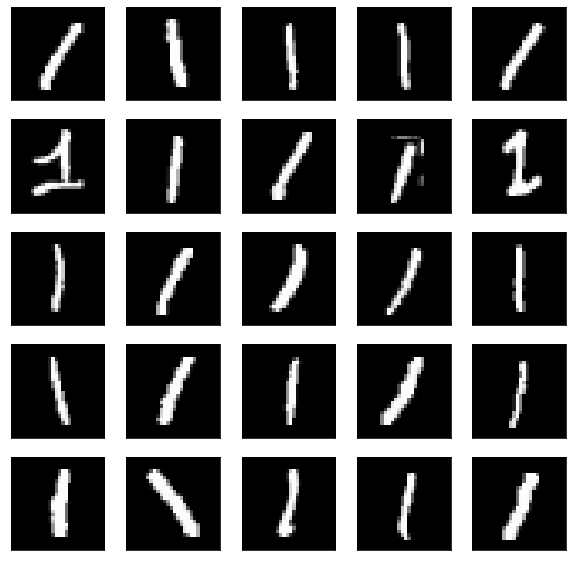

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_norm[i].reshape(28,28), cmap='gray')
plt.show()

# GAN - generowanie zera

In [17]:
#opt = keras.optimizers.Adam(lr=0.0002)
from keras.optimizers import RMSprop
opt = RMSprop(lr=0.0002, decay=6e-8)

discriminator = tf.keras.Sequential(name='D')
discriminator.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
discriminator.add(Activation('relu'))
discriminator.add(MaxPooling2D((2,2)))
discriminator.add(Flatten())
discriminator.add(Dense(10))
discriminator.add(Activation('relu'))
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

generator = tf.keras.Sequential(name='G')
generator.add(tf.keras.Input(shape=(14,)))
generator.add(Dense(32))
generator.add(Dense(576, activation='relu'))
generator.add(Reshape((24,24,1)))
generator.add(Conv2DTranspose(64, 3, activation='relu'))
generator.add(Conv2DTranspose(1, 3, activation='relu'))
generator.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
generator.summary()

GAN = tf.keras.Sequential(name='GAN')
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/checkpointGAN{epoch:02d}-{accuracy:.2f}.hdf5'

keras_callbacks   = [
      EarlyStopping(monitor='loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='loss', save_best_only=True, mode='min')
]

Model: "D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        

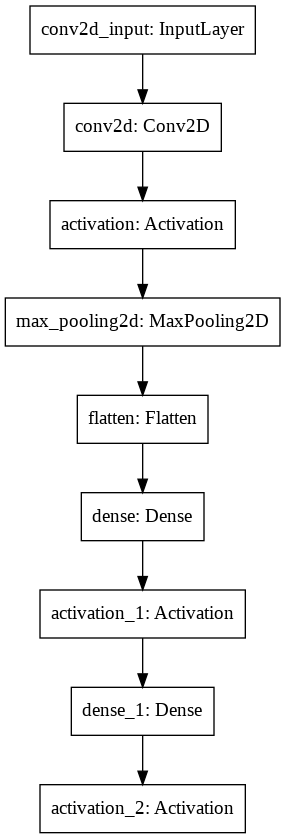

In [18]:
from keras.utils import plot_model 
plot_model(discriminator, to_file='D.png')



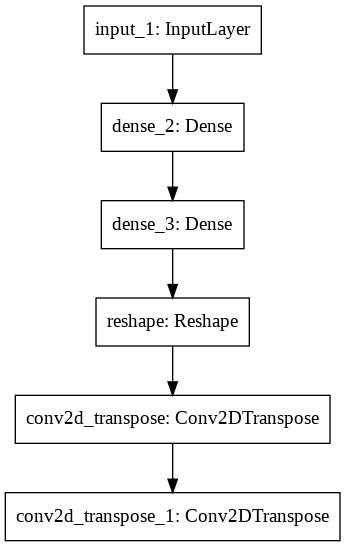

In [19]:
from keras.utils import plot_model 
plot_model(generator, to_file='G.png')

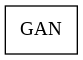

In [20]:
plot_model(GAN, to_file='GAn.png')

In [ ]:
X_fake_train = np.zeros((X_train_norm.shape[0], 14))
for sample in range(len(X_fake_train)):
  X_fake_train[sample] = np.random.normal(loc=0.5, scale=0.25, size=(14,))

In [ ]:
X_fake_train

array([[ 0.76217674,  0.89293529,  0.39712806, ...,  0.43818478,
         0.31312709,  0.21941951],
       [ 0.48347354,  0.52872033,  0.25704754, ...,  0.06441253,
         0.14081018, -0.04868697],
       [ 0.25028771,  0.65018034,  0.46932532, ...,  0.67755273,
         0.55465098,  0.4137495 ],
       ...,
       [ 0.12457191,  0.29922029,  0.3423232 , ...,  0.61707262,
         0.53227157,  0.55610085],
       [ 0.06992817,  0.68503298,  0.35598693, ...,  0.44092938,
         0.13294863, -0.0173657 ],
       [ 0.68913375,  0.45250156,  0.52925277, ..., -0.04038596,
         0.58544083,  0.32763583]])

In [ ]:
X_fake_generated_0 = generator.predict(X_fake_train)

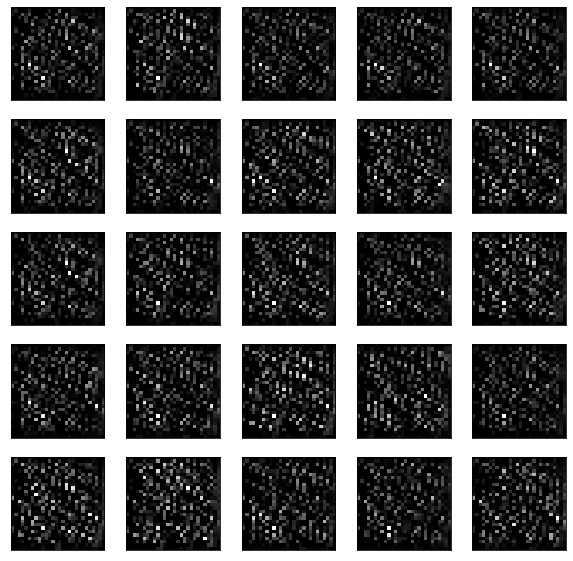

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_fake_generated_0[i].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
epochs = 25 #2 ->50
component_epochs = 5 #2
X_fake = X_fake_generated_0
images_history = []
GAN_early_stopping = 0
last_accuracy = 0.0
patience = 5

for epoch in range(epochs):

  print("\nEpoch: ", epoch+1, "\n")
  X_true_and_fake = np.concatenate((X_train_norm, X_fake.reshape(X_fake.shape[0],28,28,1)))
  y_true_and_fake = np.zeros(X_true_and_fake.shape[0])
  y_true_and_fake[:X_train_norm.shape[0]] = 1
  
  print("\nDiscriminator training:\n")
  D_hist = discriminator.fit(X_true_and_fake, y_true_and_fake, epochs=component_epochs, callbacks=keras_callbacks)
  for layer in discriminator.layers:
    layer.trainable = False
  
  noise = np.zeros((X_train_norm.shape[0], 14))
  for sample in range(len(noise)):
    noise[sample] = np.random.normal(loc=0.5, scale=0.25, size=(14,))
  y_noise = np.ones(noise.shape[0])

  print("\nGenerator training:\n")
  GAN.fit(noise, y_noise, epochs = component_epochs, callbacks=keras_callbacks)

  X_fake = generator.predict(X_fake_train)
  images_history.append(X_fake[0])
  for layer in discriminator.layers:
    layer.trainable = True

  # if D_hist.history['accuracy'][-1] > last_accuracy:
  #   GAN_early_stopping +=1
  #   if GAN_early_stopping > patience:
  #     break
  # last_accuracy = D_hist.history['accuracy'][-1]
  
  #history.history['accuracy']


Epoch:  1 


Discriminator training:

Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 0.1961 - accuracy: 0.9955
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 1.0939e-04 - accuracy: 1.0000
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 3.5560e-05 - accuracy: 1.0000
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 8.1046e-06 - accuracy: 1.0000
Epoch 5/5
422/422 [==============================] - 1s 3ms/step - loss: 3.7639e-07 - accuracy: 1.0000

Generator training:

Epoch 1/5
211/211 [==============================] - 2s 4ms/step - loss: 3.4227 - accuracy: 0.6718
Epoch 2/5
211/211 [==============================] - 1s 4ms/step - loss: 2.2141e-07 - accuracy: 1.0000
Epoch 3/5
211/211 [==============================] - 1s 4ms/step - loss: 5.4789e-10 - accuracy: 1.0000
Epoch 4/5
211/211 [==============================] - 1s 5ms/step - loss: 2.6694e-10 - accuracy: 1.0000
Epoch 5/5
211/211 [=

In [ ]:
X_fake = generator.predict(X_fake_train)

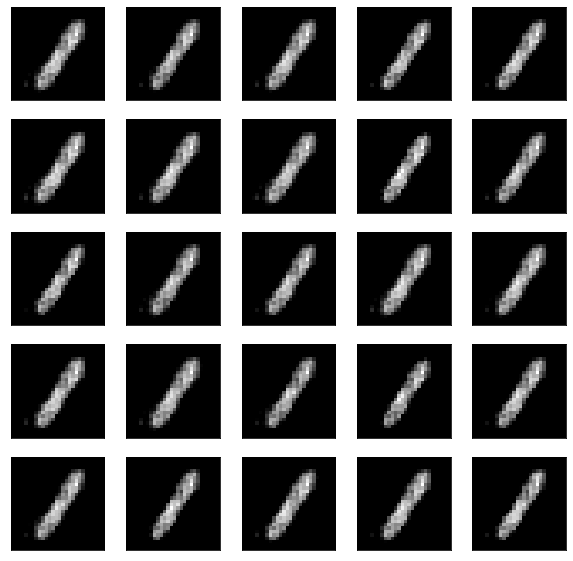

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_fake[i].reshape(28,28), cmap='gray')
plt.show()

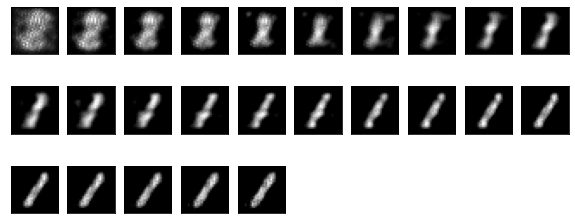

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_history[i].reshape(28,28), cmap='gray')
plt.show()

# GAN - generowanie różnych liczb

In [ ]:
X_train2, y_train2 = loadlocal_mnist(
            images_path='/content/gdrive/My Drive/Colab Notebooks/train-images.idx3-ubyte', 
            labels_path='/content/gdrive/My Drive/Colab Notebooks/train-labels.idx1-ubyte')

In [ ]:
mms2 = MinMaxScaler()
X_train_norm2 = mms2.fit_transform(X_train2).reshape(60000, 28, 28,1)

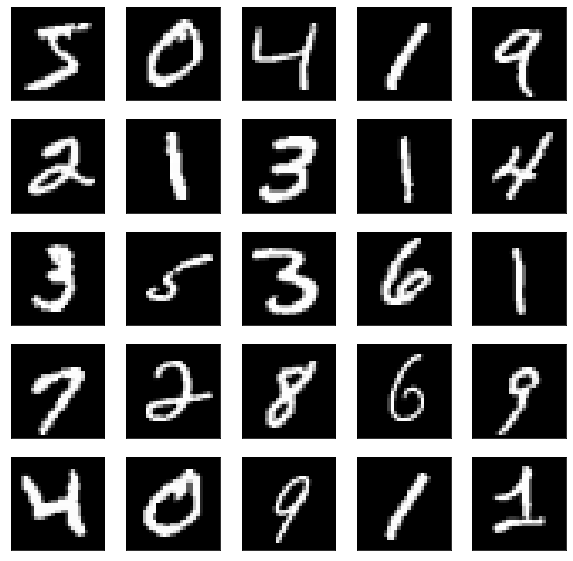

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_norm2[i].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
from keras.optimizers import RMSprop, Adam
opt = Adam(lr=0.0002)

discriminator = tf.keras.Sequential(name='D')
discriminator.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
discriminator.add(Activation('relu'))
discriminator.add(MaxPooling2D((2,2)))
discriminator.add(Conv2D(128, (3,3), activation='elu'))
discriminator.add(Flatten())
discriminator.add(Dense(256, activation='relu'))
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

generator = tf.keras.Sequential(name='G')
generator.add(tf.keras.Input(shape=(14,)))
generator.add(Dense(576, activation='relu'))
generator.add(Reshape((24,24,1)))
generator.add(Conv2DTranspose(64, 3, activation='relu'))
generator.add(Conv2DTranspose(1, 3, activation='relu'))
generator.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
generator.summary()

GAN = tf.keras.Sequential(name='GAN')
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/checkpointGAN{epoch:02d}-{accuracy:.2f}.hdf5'

keras_callbacks   = [
      EarlyStopping(monitor='loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='loss', save_best_only=True, mode='min')
]

Model: "D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       36992     
_________________________________________________________________
flatten_8 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               3965184   
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 257       

In [ ]:
X_fake_train2 = np.zeros((X_train_norm2.shape[0], 14))
for sample in range(len(X_fake_train2)):
  X_fake_train2[sample] = np.random.normal(loc=0.5, scale=0.25, size=(14,))

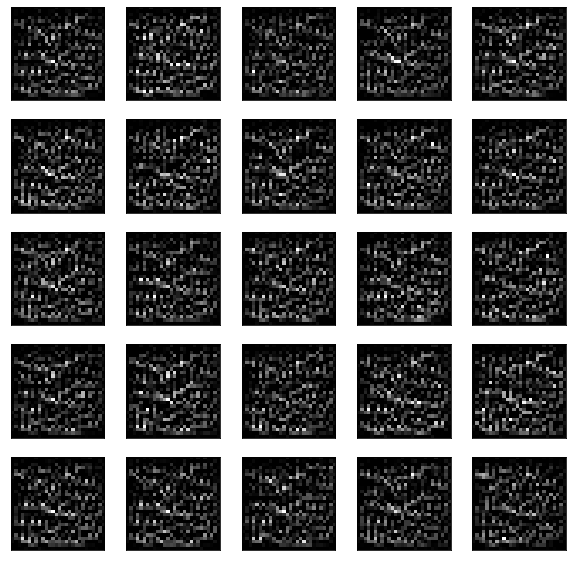

In [ ]:
X_fake_2_generated_0 = generator.predict(X_fake_train2)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_fake_2_generated_0[i].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
epochs = 100 
component_epochs = 10 
X_fake = X_fake_2_generated_0
images_history = []

for epoch in range(epochs):

  print("\nEpoch: ", epoch+1, "\n")
  X_true_and_fake = np.concatenate((X_train_norm2, X_fake.reshape(X_fake.shape[0],28,28,1)))
  y_true_and_fake = np.zeros(X_true_and_fake.shape[0])
  y_true_and_fake[:X_train_norm.shape[0]] = 1
  
  print("\nDiscriminator training:\n")
  D_hist = discriminator.fit(X_true_and_fake, y_true_and_fake, epochs=component_epochs, callbacks=keras_callbacks)
  for layer in discriminator.layers:
    layer.trainable = False
  
  noise = np.zeros((X_train_norm.shape[0], 14))
  for sample in range(len(noise)):
    noise[sample] = np.random.normal(loc=0.5, scale=0.25, size=(14,))
  y_noise = np.ones(noise.shape[0])

  print("\nGenerator training:\n")
  GAN.fit(noise, y_noise, epochs = component_epochs, callbacks=keras_callbacks)

  X_fake = generator.predict(X_fake_train)
  images_history.append(X_fake[0])
  for layer in discriminator.layers:
    layer.trainable = True


Epoch:  1 


Discriminator training:

Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1932 - accuracy: 0.9427
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1758 - accuracy: 0.9441
Epoch 3/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1724 - accuracy: 0.9448
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1746 - accuracy: 0.9434
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1714 - accuracy: 0.9439
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1715 - accuracy: 0.9431
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1685 - accuracy: 0.9436
Epoch 8/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1660 - accuracy: 0.9430
Epoch 9/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1581 - accuracy: 0.9444
Epoch 10/10
3750/3750 [===========

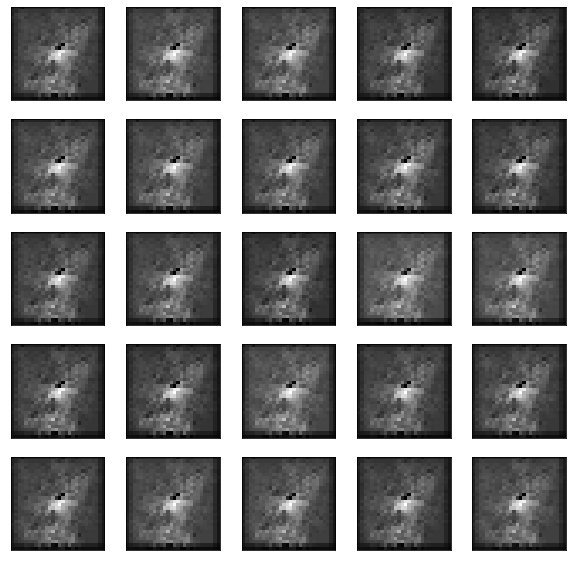

In [ ]:
X_fake = generator.predict(X_fake_train2)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_fake[i].reshape(28,28), cmap='gray')
plt.show()

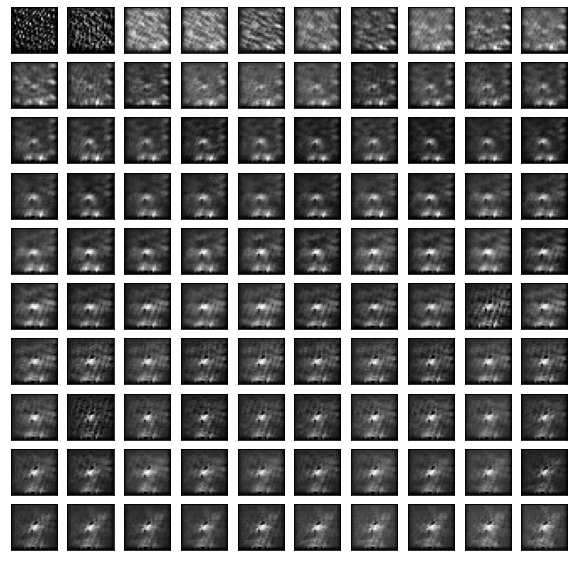

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_history[i].reshape(28,28), cmap='gray')
plt.show()